# TASK 3 - POST CENTRAL ALL FEATURES

- Face Vs House Classification
- Face Vs Bottles Classification

## FACES VC HOUSE CLASSIFICATION

## Install Required Libraries

In [1]:
pip install nilearn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load the Dataset

In [2]:
from nilearn import datasets
subj2 = datasets.fetch_haxby(subjects=[2])

[get_dataset_dir] Dataset found in /Users/prisha/nilearn_data/haxby2001

## Analyse the Dataset

In [3]:
print(subj2.keys())

dict_keys(['anat', 'func', 'session_target', 'mask_vt', 'mask_face', 'mask_house', 'mask_face_little', 'mask_house_little', 'mask', 'description'])


Anatomical imaging, which uses medical imaging technology to visualize the structure of the body and its organs, is a critical tool in diagnosing and treating a variety of medical conditions. Here in order to understand the data we have plotted the anatomical images of the brain.

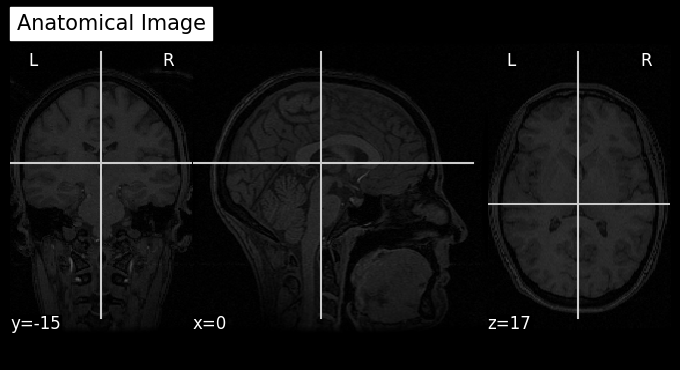

In [4]:
from nilearn import plotting

# Visualize the anatomical image
plotting.plot_anat(subj2['anat'][0], title="Anatomical Image")
plotting.show()

In [5]:
from nilearn.image import load_img

# Load the first functional scan
func_img = load_img(subj2['func'][0])

# Print basic information
print(f"Functional Image Shape: {func_img.shape}")


Functional Image Shape: (40, 64, 64, 1452)


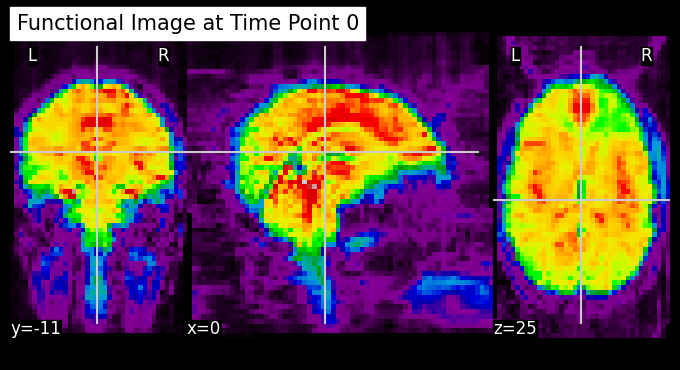

In [6]:
from nilearn import plotting
from nilearn.image import index_img

# Extract the functional image at time point 0
func_img_t0 = index_img(func_img, 0)

# Plot the first time point
plotting.plot_epi(func_img_t0, title="Functional Image at Time Point 0")
plotting.show()

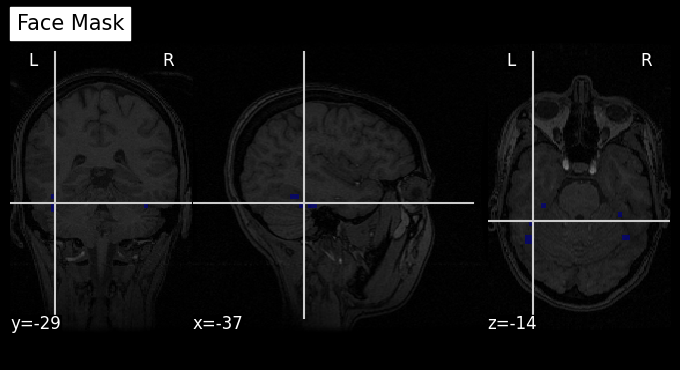

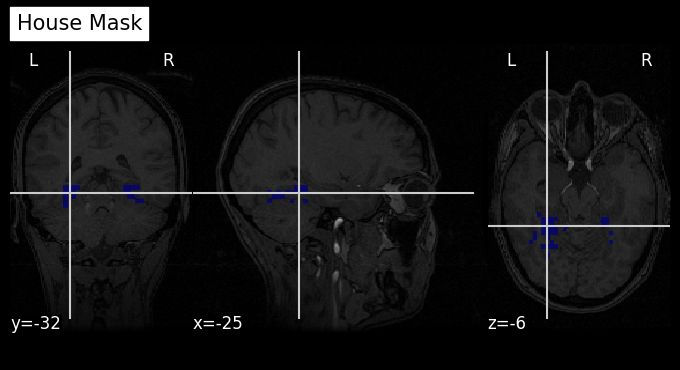

In [11]:
face_mask = load_img(subj2['mask_face'])
house_mask = load_img(subj2['mask_house'])

# Plot the masks
plotting.plot_roi(face_mask, bg_img=subj2['anat'][0], title="Face Mask")
plotting.plot_roi(house_mask, bg_img=subj2['anat'][0], title="House Mask")
plotting.show()

To understand how the ventral temporal region responds, extract time-series data corresponding to the voxels in the ventral temporal region .

In [9]:
from nilearn.maskers import NiftiMasker
import pandas as pd

# take the time series from the data that is already provided
time_series = pd.read_csv('features.csv', header=None, sep=" ")

# Inspect the extracted time series
print(f"Time-series shape: {time_series.shape}")

Time-series shape: (1452, 82)


Interpretation of Shape:

- Rows (1452): Time points, indicating how the brain’s activity evolves over time.
- Columns (82): Spatial features (voxels) in the ROI, where activity is recorded.

In [11]:
print(time_series.head())

         0         1         2         3         4         5         6   \
0  1.189508  1.388972 -2.696957 -1.453052 -0.031771  1.487190 -3.493314   
1  0.910139  1.572680 -2.731309 -1.304304 -0.030732  1.151983 -3.241824   
2  0.630770  1.343012 -2.937944 -0.810022 -0.044519  0.950149 -2.738138   
3  0.185948  1.159275 -3.041209 -0.809360 -0.236228  0.548255 -3.495429   
4  0.623537  1.434844 -2.868821 -0.907422 -0.131402  0.479795 -3.042182   

         7         8         9   ...        72        73        74        75  \
0  1.463284  1.844270 -1.505027  ... -0.419817  2.288486  0.693505  0.586189   
1  1.856637  1.580005 -1.437087  ... -0.452234  2.336382  0.475807  0.471499   
2  2.315764  1.579854 -1.369147  ... -0.468169  2.290440  0.648444  0.438892   
3  2.051363  1.645731 -1.542927  ... -0.401699  2.385255  0.430746  0.439119   
4  2.444716  1.645580 -1.233268  ... -0.467077  2.292394  0.299789  0.406512   

         76        77        78        79        80        81  
0  3

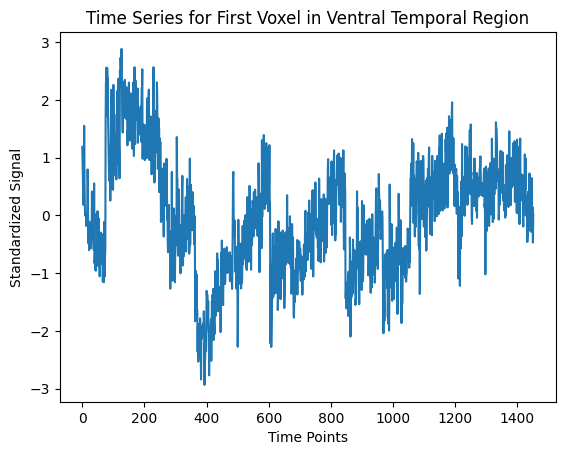

In [12]:
import matplotlib.pyplot as plt

# Plot the first voxel's time series, like for each time series we just plot the first poxel
plt.plot(time_series[0])
plt.title("Time Series for First Voxel in Ventral Temporal Region")
plt.xlabel("Time Points")
plt.ylabel("Standardized Signal")
plt.show()

In [13]:
print(subj2['session_target'])
print(subj2['session_target'][0])

['/Users/prisha/nilearn_data/haxby2001/subj2/labels.txt']
/Users/prisha/nilearn_data/haxby2001/subj2/labels.txt


In [14]:
import pandas as pd

# Load the behavioral data
behavioral = pd.read_csv(subj2['session_target'][0], sep=" ")

# Print the last few rows of the data
print(behavioral.tail())

# Extract and print unique labels
unique_labels = behavioral['labels'].unique()
print(f"Unique labels: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

     labels  chunks
1447   rest      11
1448   rest      11
1449   rest      11
1450   rest      11
1451   rest      11
Unique labels: ['rest' 'scissors' 'face' 'cat' 'shoe' 'house' 'scrambledpix' 'bottle'
 'chair']
Number of unique labels: 9


In [15]:
# Analyzing the shape that we would be working with
print(time_series.shape)
print(behavioral.shape)

(1452, 82)
(1452, 2)


### Prepare the dataset that would be used to train the model for classification, conditioned on the labels face and house.

In [16]:
import numpy as np

# Restrict to face, house conditions here
conditions = behavioral["labels"]
mask = conditions.isin(["face", "house"])

# Filter the time series and conditions using the mask
X = time_series[mask]
Y = conditions[mask]

# Print the shapes
print(time_series.shape)
print(X.shape)
print(Y.shape)

(1452, 82)
(216, 82)
(216,)


## Using Different Models for Classification

### Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and calculate accuracy
predicted_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, predicted_log_reg))

Logistic Regression Accuracy: 0.6388888888888888


### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predict and calculate accuracy
predicted_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, predicted_rf))

Random Forest Accuracy: 0.9305555555555556


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predict and calculate accuracy
predicted_knn = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, predicted_knn))

K-Nearest Neighbors Accuracy: 0.6666666666666666


In [20]:
from sklearn.svm import LinearSVC
svc=LinearSVC()

svc.fit(X_train, y_train)
predicted_svc = svc.predict(X_test)

print("LinearSVC Accuracy:", accuracy_score(y_test, predicted_svc))

LinearSVC Accuracy: 0.6388888888888888


### Here we see that unlike the last two cases, the Random Forest Classifier is performing better than the Logistic Regression. This might be because the ROI is now post-central and not ventral temporal, hence the relationship is better modeled by the Random Forest Classifier.

## LeaveOneGroupOut cross validation strategy with LinearSVC

Since we want to compare with the last two cases hence we would prefer the linear SVC model.

In [21]:
accuracy_values1 = []

# Iterate through each of the 12 chunks (cross-validation)
for val in range(12):
    # Define the training and testing conditions for each chunk
    svc = LinearSVC()
    condition_mask_train = (mask) & (behavioral["chunks"] != val)
    condition_mask_test = (mask) & (behavioral["chunks"] == val)

    # Split the time series and labels based on the condition mask for training and testing
    X_train_selected = time_series[condition_mask_train]
    X_test_selected = time_series[condition_mask_test]
    y_train_selected = conditions[condition_mask_train]
    y_test_selected = conditions[condition_mask_test]

    # Check shapes of training and test sets for debugging
    print(f"\nTrain set shape (chunk {val}): {X_train_selected.shape}")
    print(f"Test set shape (chunk {val}): {X_test_selected.shape}")


    # Train the model on the training data
    svc.fit(X_train_selected, y_train_selected)

    # Predict the labels for the test data
    predicted_selected = svc.predict(X_test_selected)

    # Calculate accuracy for this chunk and append to the list
    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values1.append(accuracy)

    # Print the accuracy for the current chunk
    print(f"Accuracy for the test chunk {val}: {accuracy}")




Train set shape (chunk 0): (198, 82)
Test set shape (chunk 0): (18, 82)
Accuracy for the test chunk 0: 0.5

Train set shape (chunk 1): (198, 82)
Test set shape (chunk 1): (18, 82)
Accuracy for the test chunk 1: 1.0

Train set shape (chunk 2): (198, 82)
Test set shape (chunk 2): (18, 82)
Accuracy for the test chunk 2: 0.9444444444444444

Train set shape (chunk 3): (198, 82)
Test set shape (chunk 3): (18, 82)
Accuracy for the test chunk 3: 0.4444444444444444

Train set shape (chunk 4): (198, 82)
Test set shape (chunk 4): (18, 82)
Accuracy for the test chunk 4: 0.3333333333333333

Train set shape (chunk 5): (198, 82)
Test set shape (chunk 5): (18, 82)
Accuracy for the test chunk 5: 0.5555555555555556

Train set shape (chunk 6): (198, 82)
Test set shape (chunk 6): (18, 82)
Accuracy for the test chunk 6: 0.5

Train set shape (chunk 7): (198, 82)
Test set shape (chunk 7): (18, 82)
Accuracy for the test chunk 7: 0.7222222222222222

Train set shape (chunk 8): (198, 82)
Test set shape (chunk 8

In [22]:
# Compute the mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracy_values1)
std_accuracy = np.std(accuracy_values1)

# Print the overall performance
print(f"\nMean Accuracy across all chunks: {mean_accuracy}")
print(f"Standard Deviation of Accuracy: {std_accuracy}")



Mean Accuracy across all chunks: 0.5925925925925927
Standard Deviation of Accuracy: 0.23166659265179262


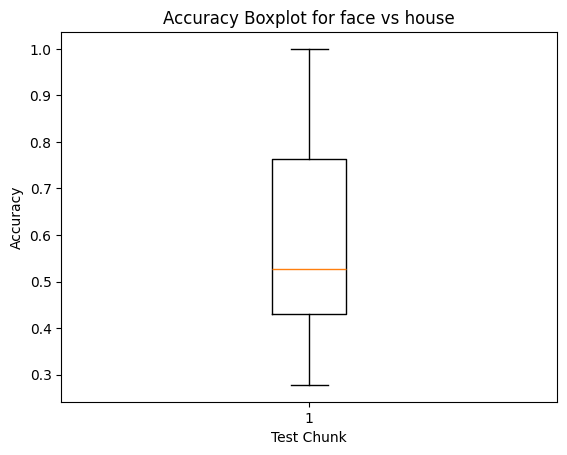

In [23]:
plt.boxplot(accuracy_values1)
plt.title('Accuracy Boxplot for face vs house')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()

## FACE VS BOTTLES CLASSIFICATION

In [24]:
# Restrict to face, house conditions here
conditions = behavioral["labels"]
mask = conditions.isin(["face", "bottle"])

# Filter the time series and conditions using the mask
X = time_series[mask]
Y = conditions[mask]

# Print the shapes
print(time_series.shape)
print(X.shape)
print(Y.shape)

(1452, 82)
(216, 82)
(216,)


In [25]:
from sklearn.svm import LinearSVC
svc=LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

svc.fit(X_train, y_train)
predicted_svc = svc.predict(X_test)

print("LinearSVC Accuracy:", accuracy_score(y_test, predicted_svc))

LinearSVC Accuracy: 0.6527777777777778


In [26]:
accuracy_values2 = []

# Iterate through each of the 12 chunks (cross-validation)
for val in range(12):
    svc = LinearSVC()
    condition_mask_train = (mask) & (behavioral["chunks"] != val)
    condition_mask_test = (mask) & (behavioral["chunks"] == val)

    # Split the time series and labels based on the condition mask for training and testing
    X_train_selected = time_series[condition_mask_train]
    X_test_selected = time_series[condition_mask_test]
    y_train_selected = conditions[condition_mask_train]
    y_test_selected = conditions[condition_mask_test]

    # Check shapes of training and test sets for debugging
    print(f"\nTrain set shape (chunk {val}): {X_train_selected.shape}")
    print(f"Test set shape (chunk {val}): {X_test_selected.shape}")


    # Train the model on the training data
    svc.fit(X_train_selected, y_train_selected)

    # Predict the labels for the test data
    predicted_selected = svc.predict(X_test_selected)

    # Calculate accuracy for this chunk and append to the list
    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values2.append(accuracy)

    # Print the accuracy for the current chunk
    print(f"Accuracy for test chunk {val}: {accuracy}")




Train set shape (chunk 0): (198, 82)
Test set shape (chunk 0): (18, 82)
Accuracy for test chunk 0: 0.5

Train set shape (chunk 1): (198, 82)
Test set shape (chunk 1): (18, 82)
Accuracy for test chunk 1: 0.6111111111111112

Train set shape (chunk 2): (198, 82)
Test set shape (chunk 2): (18, 82)
Accuracy for test chunk 2: 0.8333333333333334

Train set shape (chunk 3): (198, 82)
Test set shape (chunk 3): (18, 82)
Accuracy for test chunk 3: 0.8333333333333334

Train set shape (chunk 4): (198, 82)
Test set shape (chunk 4): (18, 82)
Accuracy for test chunk 4: 0.7222222222222222

Train set shape (chunk 5): (198, 82)
Test set shape (chunk 5): (18, 82)
Accuracy for test chunk 5: 0.6666666666666666

Train set shape (chunk 6): (198, 82)
Test set shape (chunk 6): (18, 82)
Accuracy for test chunk 6: 0.2222222222222222

Train set shape (chunk 7): (198, 82)
Test set shape (chunk 7): (18, 82)
Accuracy for test chunk 7: 0.7222222222222222

Train set shape (chunk 8): (198, 82)
Test set shape (chunk 8):

In [27]:
# Compute the mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracy_values2)
std_accuracy = np.std(accuracy_values2)

# Print the overall performance
print(f"\nMean Accuracy across all chunks: {mean_accuracy}")
print(f"Standard Deviation of Accuracy: {std_accuracy}")



Mean Accuracy across all chunks: 0.6064814814814815
Standard Deviation of Accuracy: 0.16737247669004832


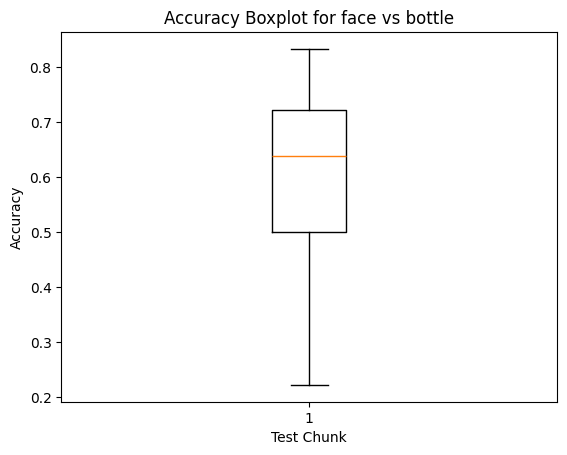

In [28]:
plt.boxplot(accuracy_values2)
plt.title('Accuracy Boxplot for face vs bottle')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()

## Analysis of Classification Results

### Face vs House Classification
Using the Linear SVC model for face vs house classification, the results are significantly lower compared to the ventral temporal region classification. This might be because the post-central region is not as well suited for this task as the ventral temporal region.

### Face vs Bottle Classification
Interestingly, unlike the face vs house classification, the face vs bottle classification performed better than face vs house. This might be because the features in the post-central region are more suited to distinguish between faces and bottles than faces and houses.


# ANALYSIS

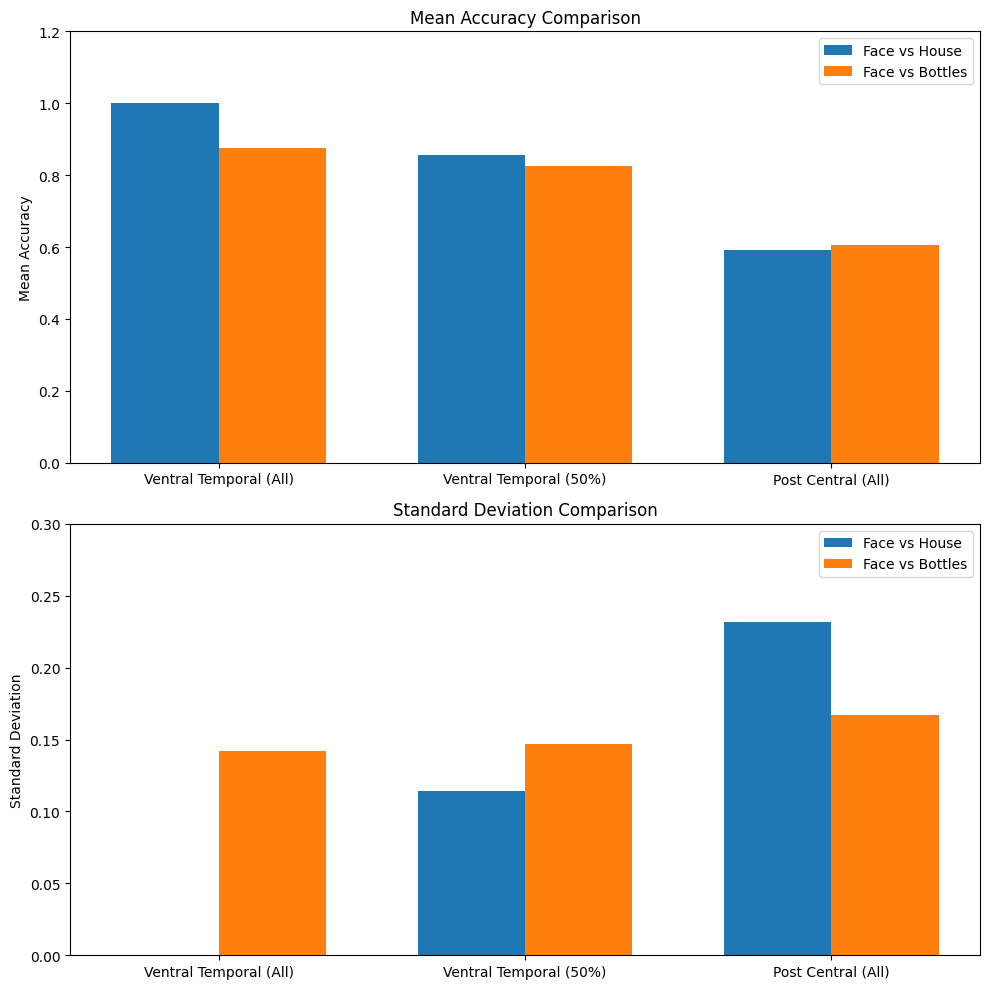

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Face vs House
labels = ['Ventral Temporal (All)', 'Ventral Temporal (50%)', 'Post Central (All)']
mean_accuracy_house = [1.0, 0.8565, 0.5926]
std_dev_house = [0.0, 0.1144, 0.2317]

# Data for Face vs Bottles
mean_accuracy_bottle = [0.875, 0.8241, 0.6065]
std_dev_bottle = [0.1419, 0.1467, 0.1674]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

# Plot Accuracy Graphs
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Accuracy comparison
rects1 = ax[0].bar(x - width / 2, mean_accuracy_house, width, label='Face vs House')
rects2 = ax[0].bar(x + width / 2, mean_accuracy_bottle, width, label='Face vs Bottles')
ax[0].set_ylabel('Mean Accuracy')
ax[0].set_title('Mean Accuracy Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[0].set_ylim(0, 1.2)



# Standard Deviation comparison
rects3 = ax[1].bar(x - width / 2, std_dev_house, width, label='Face vs House')
rects4 = ax[1].bar(x + width / 2, std_dev_bottle, width, label='Face vs Bottles')
ax[1].set_ylabel('Standard Deviation')
ax[1].set_title('Standard Deviation Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
ax[1].set_ylim(0, 0.3)

fig.tight_layout()
plt.show()